# Model optimization / further model versions


- Polynomial Regression
- K-Nearest-Neighbors Regression
- Regression Trees / Decision Tree Regresison
- Support Vector Regression

# 0. Import Requirements

In [1375]:
# importing libraries
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

# 1. Load and Split data

In [1376]:
train_data = pd.read_csv('new_traindata.csv')
test_data = pd.read_csv('new_testdata.csv')

In [1377]:
train_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0,5312
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0,5445
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0,2236
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0,6370
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1,7836


In [1378]:
test_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,299,4.0,0,10,0,2,1,2,0.472846,0.120161,605,0,3894
1,458,2.0,1,4,0,0,1,1,0.427513,0.206779,518,0,5936
2,687,4.0,1,11,0,1,0,1,0.326383,0.139545,766,0,5629
3,346,4.0,0,12,0,2,1,1,0.270196,0.057694,739,0,3310
4,291,4.0,0,10,0,1,1,2,0.522721,0.093734,463,0,4748


In [1379]:
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1:]

test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1:]

# train_features
# train_labels
# test_features
# test_labels

# 3. Model building

### 3.0 Linear Regression

In [1380]:
droplist_lr = ['workingday', 'windspeed', 'leaflets', 'price reduction', 'mnth', 'holiday', 'weekday']
train_features_lr = train_features.drop(droplist_lr, axis=1)
test_features_lr = test_features.drop(droplist_lr, axis=1)
train_features_lr.head()

,instant,season,yr,weathersit,atemp
0,154,2.0,0,1,0.587133
1,685,4.0,1,2,0.324492
2,368,1.0,1,1,0.126275
3,472,2.0,1,1,0.614925
4,442,1.0,1,2,0.505046


In [1381]:
lr_model = linear_model.LinearRegression()
lr_model.fit(train_features_lr, train_labels)

lr_prediction = lr_model.predict(test_features_lr)

In [1382]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, lr_prediction)

print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",lr_model.score(test_features_lr, test_labels))

MAE: 911.851
R^2 value of the model:  0.3804996890160657


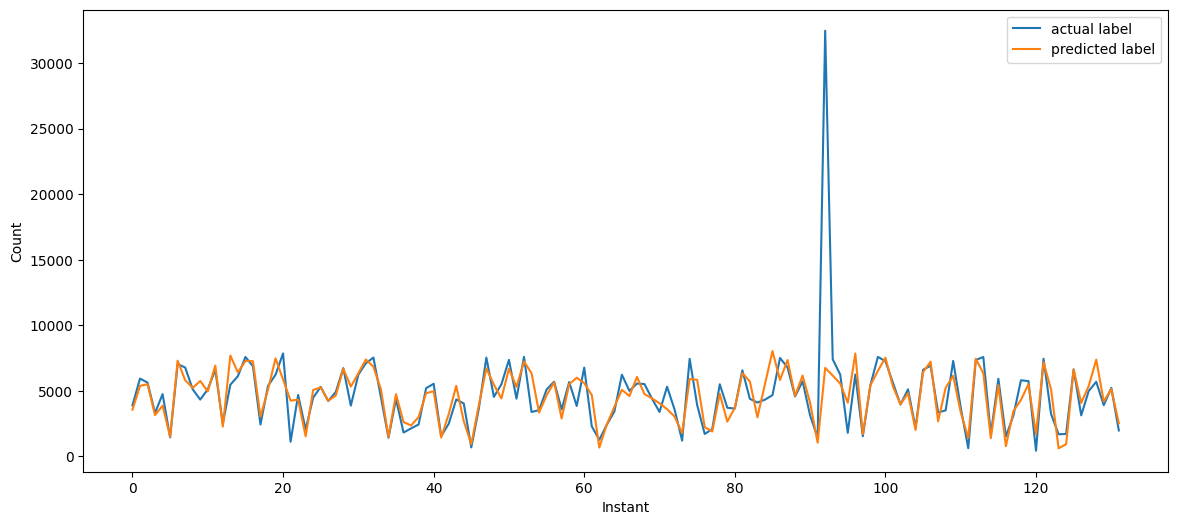

In [1383]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(lr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [1384]:
print(f"Predict label for following example:\n{test_features_lr.iloc[0,:]}")

#Predict a single value
single_lr_prediction = lr_model.predict([test_features_lr.iloc[0,:]])[0]

print("\nPredicted label: ", single_lr_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_lr_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  [3560.18708843]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -333.812912
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3.1. Polynomial Regression

In [1385]:
droplist_poly = ['workingday', 'windspeed', 'leaflets', 'price reduction']
train_features_poly = train_features.drop(droplist_poly, axis=1)
test_features_poly = test_features.drop(droplist_poly, axis=1)
train_features_poly.head()

,instant,season,yr,mnth,holiday,weekday,weathersit,atemp
0,154,2.0,0,6,0,0,1,0.587133
1,685,4.0,1,11,0,6,2,0.324492
2,368,1.0,1,1,0,1,1,0.126275
3,472,2.0,1,4,1,0,1,0.614925
4,442,1.0,1,3,0,1,2,0.505046


In [1386]:
poly_model = make_pipeline(PolynomialFeatures(degree=2, # 2 = best value
                                              interaction_only=False, # False = default = best value
                                              include_bias=True, # True/False = no significant change
                                              order='C'), # C/F = no significant change
                           linear_model.LinearRegression()
                           )

poly_model.fit(train_features_poly, train_labels)

poly_prediction = poly_model.predict(test_features_poly)

In [1387]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, poly_prediction)

print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",poly_model.score(test_features_poly, test_labels))

MAE: 787.973
R^2 value of the model:  0.4194389747273023


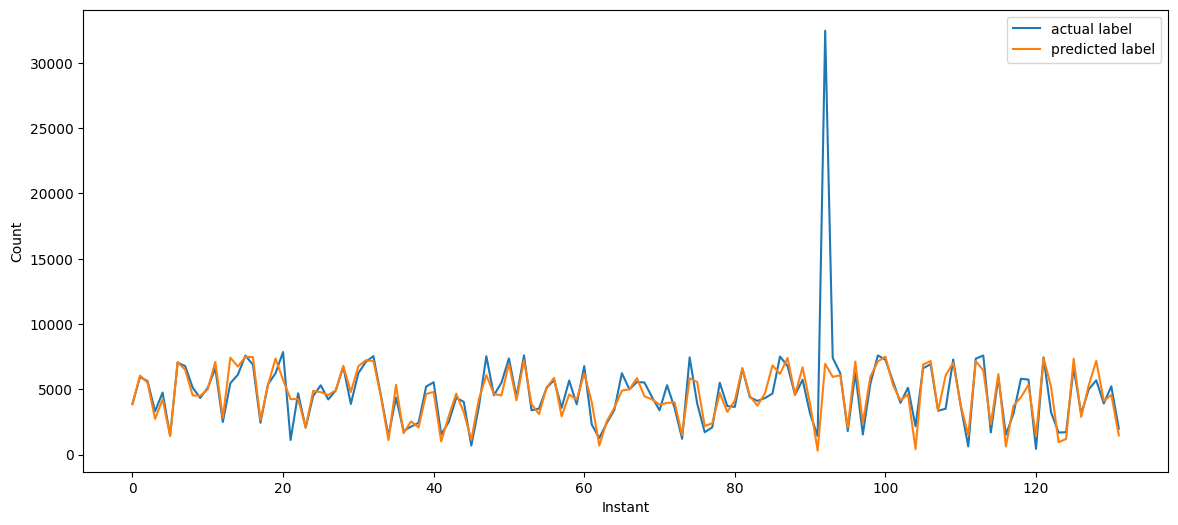

In [1388]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(poly_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [1389]:
print(f"Predict label for following example:\n{test_features_poly.iloc[0,:]}")

#Predict a single value
single_poly_prediction = poly_model.predict([test_features_poly.iloc[0,:]])[0]

print("\nPredicted label: ", single_poly_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_poly_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         2.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  [3841.56494294]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -52.435057
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 3.2. K-Nearest-neighbours Regression

In [1390]:
droplist_knn = ['leaflets', 'price reduction', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']
train_features_knn = train_features.drop(droplist_knn, axis=1)
test_features_knn = test_features.drop(droplist_knn, axis=1)
train_features_knn.head()

,instant,season,atemp,windspeed
0,154,2.0,0.587133,0.161118
1,685,4.0,0.324492,0.114392
2,368,1.0,0.126275,0.198321
3,472,2.0,0.614925,0.172953
4,442,1.0,0.505046,0.089160


In [1391]:
knn_model = KNeighborsRegressor(n_neighbors=3, # best value
                                weights='uniform', # default
                                algorithm='auto', # default
                                leaf_size=30, # default
                                p=10, # best value
                                metric='minkowski', # default
                                metric_params=None, # default,
                                n_jobs=None # default
                                )

knn_model.fit(train_features_knn, train_labels)

knn_prediction = knn_model.predict(test_features_knn)

In [1392]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, knn_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",knn_model.score(test_features_knn, test_labels))

MAE: 787.889
R^2 value of the model:  0.4241129170014134


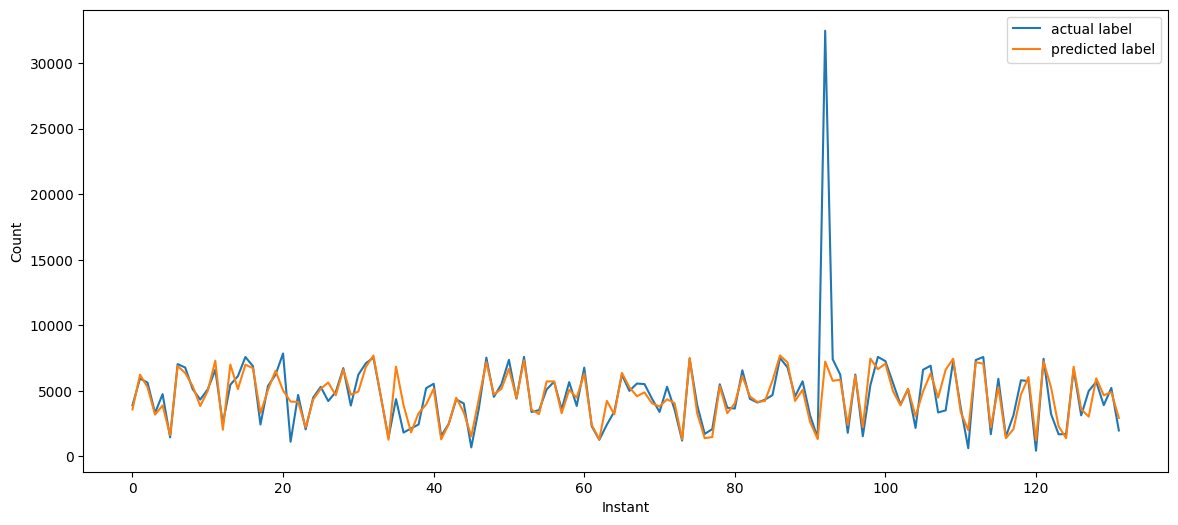

In [1393]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(knn_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [1394]:
print(f"Predict label for following example:\n{test_features_knn.iloc[0,:]}")

#Predict a single value
single_knn_prediction = knn_model.predict([test_features_knn.iloc[0,:]])[0]

print("\nPredicted label: ", single_knn_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_knn_prediction - test_labels.iloc[0])

Predict label for following example:
instant      299.000000
season         4.000000
atemp          0.472846
windspeed      0.120161
Name: 0, dtype: float64

Predicted label:  [3580.]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -314.0
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### 3.3. Regression Tree / Decision Tree Regression

In [1395]:
droplist_tree = ['leaflets', 'price reduction', 'yr', 'mnth', 'holiday', 'windspeed', 'season']
train_features_tree = train_features.drop(droplist_tree, axis=1)
test_features_tree = test_features.drop(droplist_tree, axis=1)
train_features_tree.head()

,instant,weekday,workingday,weathersit,atemp
0,154,0,1,1,0.587133
1,685,6,1,2,0.324492
2,368,1,1,1,0.126275
3,472,0,0,1,0.614925
4,442,1,0,2,0.505046


In [1396]:
tree_model = DecisionTreeRegressor(criterion='absolute_error', # best value
                                   splitter='best', # best value
                                   max_depth=5, # best value
                                   min_samples_split=2, # default
                                   min_samples_leaf=5, # best value
                                   min_weight_fraction_leaf=0.0, # default
                                   max_features=None, # default
                                   random_state=None, # default
                                   max_leaf_nodes=None, # default
                                   min_impurity_decrease= 0.0, # default,
                                   ccp_alpha=0.0 # default
                                   )

tree_model.fit(train_features_tree, train_labels)

tree_prediction = tree_model.predict(test_features_tree)

In [1397]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, tree_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",tree_model.score(test_features_tree, test_labels))

MAE: 817.727
R^2 value of the model:  0.44207064714392696


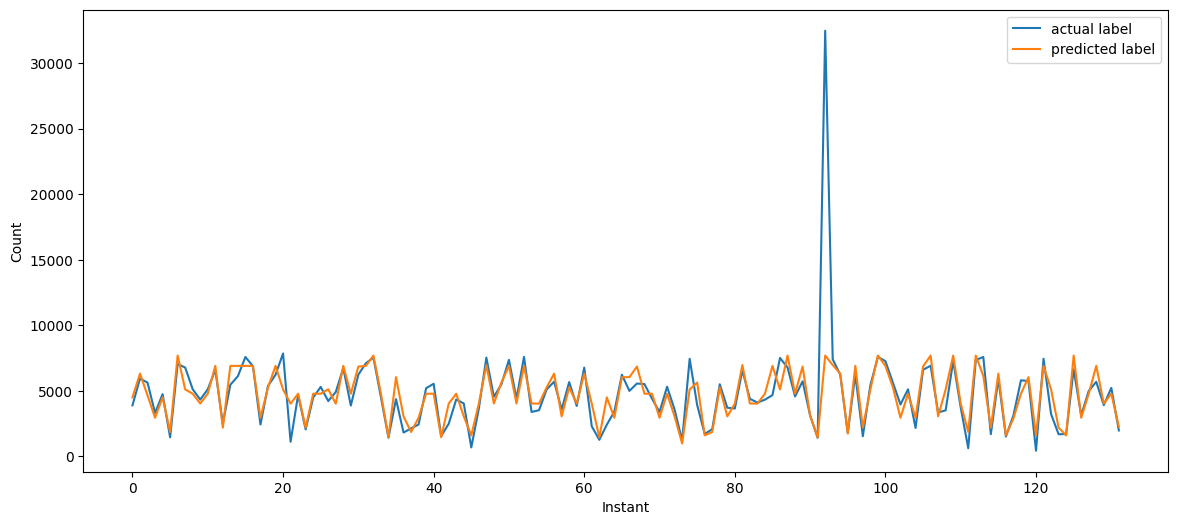

In [1398]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(tree_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [1399]:
print(f"Predict label for following example:\n{test_features_tree.iloc[0,:]}")

#Predict a single value
single_tree_prediction = tree_model.predict([test_features_tree.iloc[0,:]])[0]

print("\nPredicted label: ", single_tree_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_tree_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
weekday         2.000000
workingday      1.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  4501.5
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt    607.5
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 3.4. Support Vector Regression

In [1400]:
droplist_svr = ['leaflets', 'yr', 'windspeed', 'weekday', 'workingday']
train_features_svr = train_features.drop(droplist_svr, axis=1)
test_features_svr = test_features.drop(droplist_svr, axis=1)
train_features_svr.head()

,instant,season,mnth,holiday,weathersit,atemp,price reduction
0,154,2.0,6,0,1,0.587133,0
1,685,4.0,11,0,2,0.324492,0
2,368,1.0,1,0,1,0.126275,0
3,472,2.0,4,1,1,0.614925,0
4,442,1.0,3,0,2,0.505046,1


In [1401]:
svr_model = SVR(kernel='linear', # best value
                C=100, # best value
                epsilon=0.2,  # best value
                shrinking=True, # default
                cache_size=200, # default
                max_iter=-1 # default
                )

svr_model.fit(train_features_svr, train_labels)

svr_prediction = svr_model.predict(test_features_svr)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1402]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, svr_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",svr_model.score(test_features_svr, test_labels))

MAE: 913.187
R^2 value of the model:  0.3900211198538589


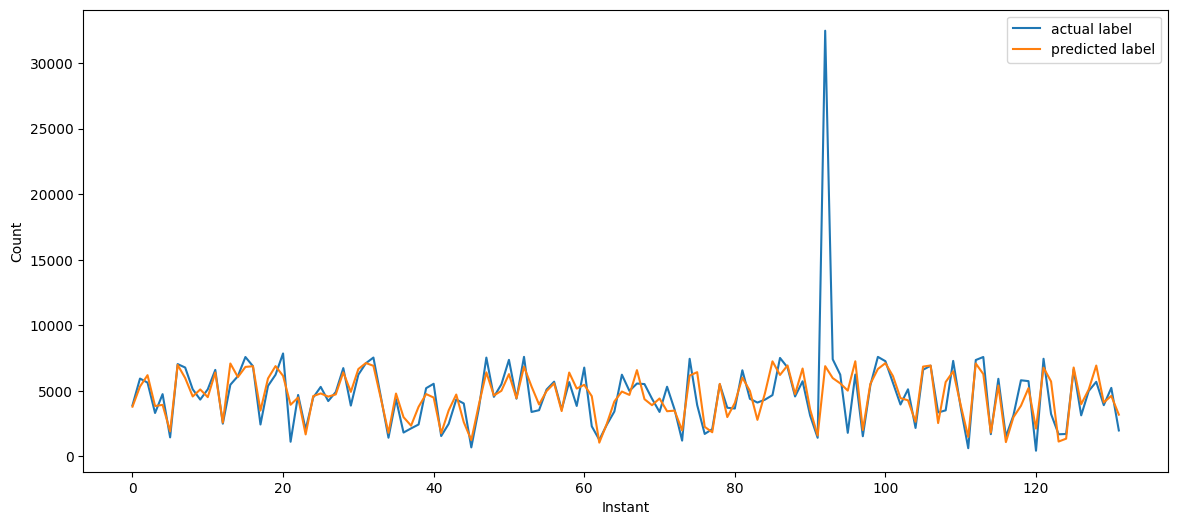

In [1403]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(svr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [1404]:
print(f"Predict label for following example:\n{test_features_svr.iloc[0,:]}")

#Predict a single value
single_svr_prediction = svr_model.predict([test_features_svr.iloc[0,:]])[0]

print("\nPredicted label: ", single_svr_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_svr_prediction - test_labels.iloc[0])

Predict label for following example:
instant            299.000000
season               4.000000
mnth                10.000000
holiday              0.000000
weathersit           2.000000
atemp                0.472846
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  3793.141145869435
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -100.858854
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### GBR

In [1405]:
droplist_gbr = ['leaflets', 'yr', 'windspeed', 'weekday', 'workingday', 'season', 'mnth', 'holiday', 'weathersit', 'atemp', 'price reduction']
train_features_gbr = train_features.drop(droplist_gbr, axis=1)
test_features_gbr = test_features.drop(droplist_gbr, axis=1)
train_features_gbr.head()

,instant
0,154
1,685
2,368
3,472
4,442


In [1406]:
gbr = GradientBoostingRegressor(loss='squared_error',
                                learning_rate=0.4,
                                n_estimators=150,
                                subsample=1,
                                criterion='squared_error',
                                min_samples_split=2, 
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.0,
                                max_depth=4,
                                min_impurity_decrease=0.0,
                                init=None,
                                random_state=None,
                                max_features=None,
                                alpha=0.9,
                                verbose=0,
                                max_leaf_nodes=None,
                                warm_start=False,
                                validation_fraction=0.1,
                                n_iter_no_change=None,
                                tol=1e-4,
                                ccp_alpha=0.0)

gbr.fit(train_features, train_labels)

gbr.score(test_features, test_labels)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.48181022093350856

### BR

In [1407]:
droplist_br = ['leaflets', 'yr', 'windspeed', 'weekday', 'workingday', 'mnth', 'holiday', 'weathersit', 'atemp', 'price reduction']
train_features_br = train_features.drop(droplist_br, axis=1)
test_features_br = test_features.drop(droplist_br, axis=1)
train_features_br.head()

,instant,mnth
0,154,6
1,685,11
2,368,1
3,472,4
4,442,3


In [1408]:
br = BaggingRegressor(estimator=None,
                      n_estimators=10,
                      max_samples=1.0,
                      max_features=1.0,
                      bootstrap=True,
                      oob_score=False,
                      warm_start=False,
                      n_jobs=None,
                      random_state=None,
                      verbose=0)

br.fit(train_features, train_labels)

br.score(test_features, test_labels)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.4556287365809577